In [13]:
from load_config import LoadDirectoriesConfig, LoadRAGConfig, LoadOpenAIConfig, LoadConfig
from langchain_core.messages import ToolMessage
from utils.utilities import _print_event

In [ ]:
download_databases = True
if download_databases:
    from download_data import download_travel_data
    download_travel_data()

In [14]:
CFG_DIRECTORIES = LoadDirectoriesConfig()
CFG_OPENAI = LoadOpenAIConfig()
CFG_RAG = LoadRAGConfig()
CFG = LoadConfig()
db = CFG_DIRECTORIES.local_file
backup_file = CFG_DIRECTORIES.backup_file

**Construct the BrookAI Graph**

In [15]:
from agentic_system_design.construct_graph import BrookAIGraph
graph_instance = BrookAIGraph()
graph = graph_instance.Compile_graph()

**Display/save the graph image**

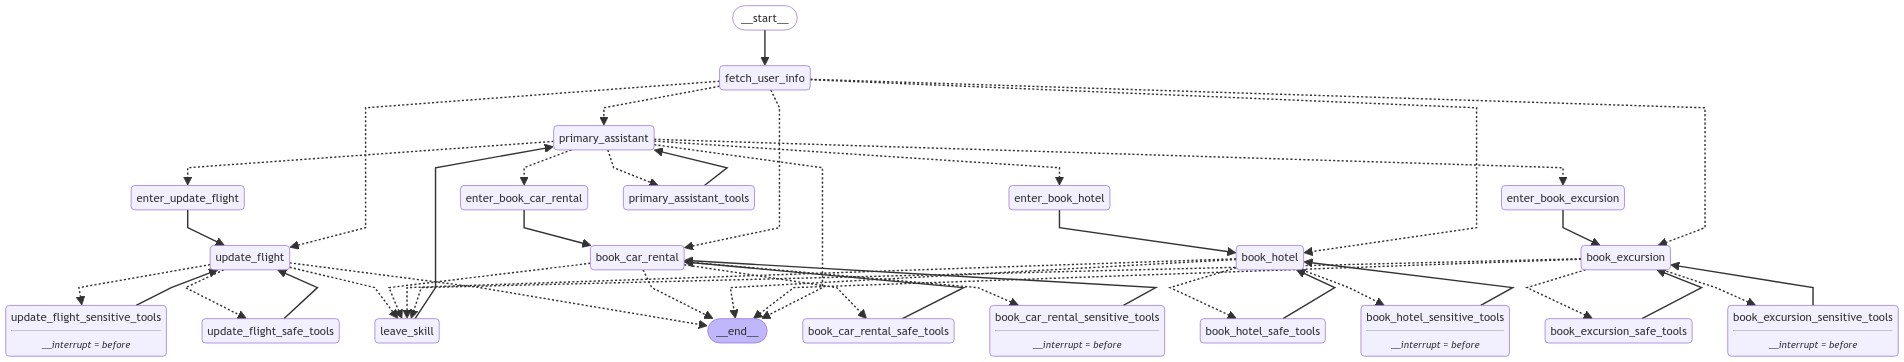

In [16]:
from IPython.display import Image, display
save_image = False
try:
    # Generate the image and save it to a variable
    image_data = graph.get_graph(xray=True).draw_mermaid_png()

    if save_image:
        # Save the image data to a file
        with open('graph_image.png', 'wb') as file:
            file.write(image_data)
        print("Image saved successfully.")
    
    # Display the image
    display(Image(image_data))
except Exception as e:
    print(f"An error occurred: {e}")

**This cell demonstrates a sample conversation between a customer and BrookAI agentic chatbot**

In [17]:
import shutil
import uuid

sample_questions = ["Hi there, I want the info of my flight", 
                    "What does CDG mean? where can I find more info about it?",
                    "According the swiss airlines policy, can I cancel my ticket?",
                    "Ok, I want to see my options for booking a hotel for 7 days",
                    "Reserve Hilton Basel for my 7 days stay",
                    "Now for a car, what are my options when I arrived at my destination?",
                    "Book a rental car from Avis for me",
                    "Nice. Tell me the full info of my hotel and rented car",
                    "Cool so now what recommendations do you have on excursions?",
                    "Are they available while I'm there?",
                    "Interesting - I like the museums, what options are there?",
                    "OK great pick one and book it for my second day there"
                    ]

# Update with the backup file so we can restart from the original place in each section
shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())
print("thread_id:", thread_id)

config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": "3442 587242",
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
        "recursion_limit": 50
    }
}

_printed = set()
# We can reuse the tutorial questions from part 1 to see how it does.
for question in sample_questions:
    events = graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
    for event in events:
        _print_event(event, _printed)
    snapshot = graph.get_state(config)
    while snapshot.next:
        result = graph.invoke(
            None,
            config,
        )
        snapshot = graph.get_state(config)

thread_id: 4b83e852-e84b-4f18-ba15-dee8d2457d85
================================ Human Message =================================

Hi there, I want the info of my flight
================================== Ai Message ==================================

Hello! I can help you with that. Could you please provide me with your ticket number or booking reference?
================================ Human Message =================================

What does CDG mean? where can I find more info about it?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_rw6FsxX8DoJEbx2U3hqY347E)
 Call ID: call_rw6FsxX8DoJEbx2U3hqY347E
  Args:
    query: CDG airport meaning
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.welcomepickups.com/paris/charles-de-gaulle-airport/", "content": "Paris-Charles de Gaulle Airport (CDG), also known as Roissy Airport

In [20]:
snapshot[0]["messages"]

[HumanMessage(content='Hi there, I want the info of my flight', id='d19ac305-3b29-423b-936b-efdd32d67760'),
 AIMessage(content='Hello! I can help you with that. Could you please provide me with your ticket number or booking reference?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 1010, 'total_tokens': 1033}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-cf4eee45-3c7d-4ce7-a15f-13a9f7a0bcfc-0', usage_metadata={'input_tokens': 1010, 'output_tokens': 23, 'total_tokens': 1033}),
 HumanMessage(content='What does CDG mean? where can I find more info about it?', id='2afa566a-ee0e-4741-9e57-0764dfae7edb'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_rw6FsxX8DoJEbx2U3hqY347E', 'function': {'arguments': '{"query":"CDG airport meaning"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata